# Data Loading

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedKFold

In [2]:
vosoughi_false_df = pd.read_csv('./rq2_vosoughi_False_features.csv', index_col=0, sep=',', encoding='utf-8')
vosoughi_true_df = pd.read_csv('./rq2_vosoughi_True_features.csv', index_col=0, sep=',', encoding='utf-8')
df = pd.concat([vosoughi_false_df, vosoughi_true_df])
# vosoughi_df = vosoughi_false_df
df.shape

(107015, 16)

In [5]:
df = pd.read_csv('./fibVid_features_with_unique_users.csv', sep=',', encoding='utf-8', index_col=None)
df

,cascade_root_id,category,unique_user_count,depth,size,max_breadth,virality,strongly_cc,weakly_cc,size_of_scc,avg_cluster_coef,density,layer_ratio,structural_heterogeneity,characteristic_distance,veracity
0,1288771853822103552,covid_true,6,2.0,7.0,6.0,0.190476,7.0,1.0,7.0,0.0,0.142857,1.166667,1.285604,1.024628,1.0
1,1251209120528637952,covid_true,140,1.0,142.0,142.0,0.007042,142.0,1.0,142.0,0.0,0.007042,1.000000,5.979279,124.999346,1.0
2,1238131956526784512,covid_true,1,0.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,-99999.000000,1.0
3,1262244018198441984,covid_true,17,2.0,20.0,17.0,0.065789,20.0,1.0,20.0,0.0,0.050000,1.176471,2.004151,1.051074,1.0
4,1273140209090203651,covid_true,119,2.0,121.0,102.0,0.010882,121.0,1.0,121.0,0.0,0.008264,1.186275,4.690253,1.079731,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,1225294960087486464,non_covid_false,107,2.0,107.0,99.0,0.010756,107.0,1.0,107.0,0.0,0.009346,1.080808,4.815929,0.756799,0.0
1770,1248416686220300298,non_covid_false,22,1.0,22.0,22.0,0.045455,22.0,1.0,22.0,0.0,0.045455,1.000000,2.400397,20.829333,0.0
1771,1224930570985144322,non_covid_false,27,1.0,31.0,31.0,0.032258,31.0,1.0,31.0,0.0,0.032258,1.000000,2.829900,31.247336,0.0
1772,1273769391461560320,non_covid_false,78,2.0,78.0,70.0,0.015485,78.0,1.0,78.0,0.0,0.012821,1.114286,4.006236,0.877097,0.0


In [6]:
filtered_df = df[(df.characteristic_distance != -99999) & (df.depth != 0)]
filtered_df.shape

(1412, 16)

In [7]:
filtered_df.groupby(['veracity']).count()

,cascade_root_id,category,unique_user_count,depth,size,max_breadth,virality,strongly_cc,weakly_cc,size_of_scc,avg_cluster_coef,density,layer_ratio,structural_heterogeneity,characteristic_distance
veracity,,,,,,,,,,,,,,,
0.0,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105
1.0,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307


In [43]:
~filtered_df.columns.isin(['depth', 'size'])

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [49]:
X_train_val[X_train_val.columns[~X_train_val.columns.isin(['depth', ])]]

,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
69031,8.0,8.0,0.125000,0.125000,1.000000,1.511858,7.564745
71222,4.0,3.0,0.416667,0.250000,1.333333,1.054093,1.440933
59037,2.0,2.0,0.500000,0.500000,1.000000,1.000000,1.439579
67889,6.0,6.0,0.166667,0.166667,1.000000,1.341641,5.540523
74902,11.0,9.0,0.127273,0.090909,1.222222,1.501666,1.173693
...,...,...,...,...,...,...,...
74184,9.0,8.0,0.138889,0.111111,1.125000,1.452369,0.913574
61760,3.0,3.0,0.333333,0.333333,1.000000,1.060660,2.466303
56182,2.0,2.0,0.500000,0.500000,1.000000,1.000000,1.439579
53545,2.0,2.0,0.500000,0.500000,1.000000,1.000000,1.439579


In [6]:
filtered_df.groupby(['veracity']).count()

,cascade_root_id,category,unique_user_count,depth,size,max_breadth,virality,strongly_cc,weakly_cc,size_of_scc,avg_cluster_coef,density,layer_ratio,structural_heterogeneity,characteristic_distance
veracity,,,,,,,,,,,,,,,
0.0,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105
1.0,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307


In [21]:
31858/38006, 6149/38006

(0.8382360679892649, 0.16179024364574016)

In [ ]:
filtered_df[, ]

Index(['cascade_root_id', 'category', 'unique_user_count', 'depth', 'size',
       'max_breadth', 'virality', 'strongly_cc', 'weakly_cc', 'size_of_scc',
       'avg_cluster_coef', 'density', 'layer_ratio',
       'structural_heterogeneity', 'characteristic_distance', 'veracity'],
      dtype='object')

In [4]:
# filtered_df.drop(['cascade_root_id', 'cascade_id', 'time_bucket', 'strongly_cc', 'weakly_cc', 'size_of_scc', 'avg_cluster_coef'], axis=1, inplace=True)
filtered_df.drop(['cascade_root_id', 'strongly_cc', 'weakly_cc', 'size_of_scc', 'avg_cluster_coef'], axis=1, inplace=True)
filtered_df

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_984\2130308080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['cascade_root_id', 'strongly_cc', 'weakly_cc', 'size_of_scc', 'avg_cluster_coef'], axis=1, inplace=True)


,category,unique_user_count,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance,veracity
0,covid_true,6,2.0,7.0,6.0,0.190476,0.142857,1.166667,1.285604,1.024628,1.0
1,covid_true,140,1.0,142.0,142.0,0.007042,0.007042,1.000000,5.979279,124.999346,1.0
3,covid_true,17,2.0,20.0,17.0,0.065789,0.050000,1.176471,2.004151,1.051074,1.0
4,covid_true,119,2.0,121.0,102.0,0.010882,0.008264,1.186275,4.690253,1.079731,1.0
6,covid_true,14,1.0,14.0,14.0,0.071429,0.071429,1.000000,1.941451,13.151559,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1769,non_covid_false,107,2.0,107.0,99.0,0.010756,0.009346,1.080808,4.815929,0.756799,0.0
1770,non_covid_false,22,1.0,22.0,22.0,0.045455,0.045455,1.000000,2.400397,20.829333,0.0
1771,non_covid_false,27,1.0,31.0,31.0,0.032258,0.032258,1.000000,2.829900,31.247336,0.0
1772,non_covid_false,78,2.0,78.0,70.0,0.015485,0.012821,1.114286,4.006236,0.877097,0.0


In [5]:
# for RQ4Final1

filtered_df['depth'] = filtered_df['depth'] / filtered_df['unique_user_count']
filtered_df['size'] = filtered_df['size'] / filtered_df['unique_user_count'] 
filtered_df['max_breadth'] = filtered_df['max_breadth'] / filtered_df['unique_user_count']
filtered_df['virality'] = filtered_df['virality'] / filtered_df['unique_user_count'] 
filtered_df['density'] = filtered_df['density'] / filtered_df['unique_user_count']
filtered_df['layer_ratio'] = filtered_df['layer_ratio'] / filtered_df['unique_user_count']
filtered_df['structural_heterogeneity'] = filtered_df['structural_heterogeneity'] / filtered_df['unique_user_count']
filtered_df['characteristic_distance'] = filtered_df['characteristic_distance'] / filtered_df['unique_user_count']
filtered_df

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_3016\1545993543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['depth'] = filtered_df['depth'] / filtered_df['unique_user_count']
C:\Users\siddiquee\AppData\Local\Temp\ipykernel_3016\1545993543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['size'] = filtered_df['size'] / filtered_df['unique_user_count']
C:\Users\siddiquee\AppData\Local\Temp\ipykernel_3016\1545993543.py:5: SettingWithCopyWarning: 
A value is trying to be set o

,category,unique_user_count,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance,veracity
0,covid_true,6,0.333333,1.166667,1.000000,0.031746,0.023810,0.194444,0.214267,0.170771,1.0
1,covid_true,140,0.007143,1.014286,1.014286,0.000050,0.000050,0.007143,0.042709,0.892852,1.0
3,covid_true,17,0.117647,1.176471,1.000000,0.003870,0.002941,0.069204,0.117891,0.061828,1.0
4,covid_true,119,0.016807,1.016807,0.857143,0.000091,0.000069,0.009969,0.039414,0.009073,1.0
6,covid_true,14,0.071429,1.000000,1.000000,0.005102,0.005102,0.071429,0.138675,0.939397,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1769,non_covid_false,107,0.018692,1.000000,0.925234,0.000101,0.000087,0.010101,0.045009,0.007073,0.0
1770,non_covid_false,22,0.045455,1.000000,1.000000,0.002066,0.002066,0.045455,0.109109,0.946788,0.0
1771,non_covid_false,27,0.037037,1.148148,1.148148,0.001195,0.001195,0.037037,0.104811,1.157309,0.0
1772,non_covid_false,78,0.025641,1.000000,0.897436,0.000199,0.000164,0.014286,0.051362,0.011245,0.0


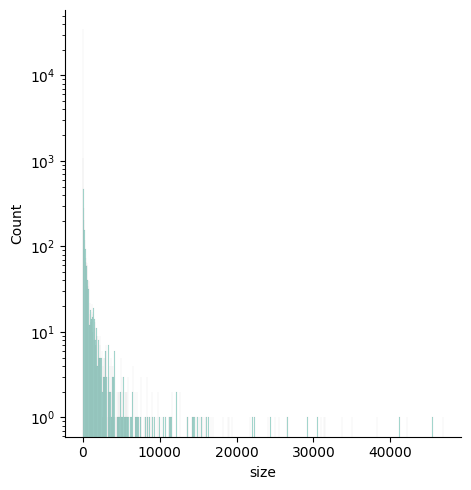

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_palette("Set3")
sns.displot(filtered_df, x="size", bins=1000)
# plt.xscale('log')
plt.yscale('log')
plt.savefig('./size_distribution_vosoughi.pdf', format='pdf')

In [7]:
import numpy as np 
a = list(set([i for i in filtered_df['size'].to_list()]))
len([i for i in filtered_df['size'].to_list() if i < np.median(a)]), len([i for i in filtered_df['size'].to_list() if i >= np.median(a)])

(37310, 697)

In [5]:
smaller_df = filtered_df[filtered_df['size'] < np.median(list(set([i for i in filtered_df['size'].to_list()])))]
print(smaller_df.shape)
smaller_df[(smaller_df.characteristic_distance != -99999) & (smaller_df.depth != 0)].groupby(['veracity']).count()

(1166, 11)


,category,unique_user_count,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
veracity,,,,,,,,,,
0.0,909,909,909,909,909,909,909,909,909,909
1.0,257,257,257,257,257,257,257,257,257,257


In [6]:
bigger_df = filtered_df[filtered_df['size'] >= np.median(list(set([i for i in filtered_df['size'].to_list()])))]
print(bigger_df.shape)
bigger_df[(bigger_df.characteristic_distance != -99999) & (bigger_df.depth != 0)].groupby(['veracity']).count()

(697, 9)


,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
veracity,,,,,,,,
0.0,654,654,654,654,654,654,654,654
1.0,43,43,43,43,43,43,43,43


In [5]:
filtered_df.iloc[:, 2:len(list(filtered_df.columns))-1]

,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
0,2.0,7.0,6.0,0.190476,0.142857,1.166667,1.285604,1.024628
1,1.0,142.0,142.0,0.007042,0.007042,1.000000,5.979279,124.999346
3,2.0,20.0,17.0,0.065789,0.050000,1.176471,2.004151,1.051074
4,2.0,121.0,102.0,0.010882,0.008264,1.186275,4.690253,1.079731
6,1.0,14.0,14.0,0.071429,0.071429,1.000000,1.941451,13.151559
...,...,...,...,...,...,...,...,...
1769,2.0,107.0,99.0,0.010756,0.009346,1.080808,4.815929,0.756799
1770,1.0,22.0,22.0,0.045455,0.045455,1.000000,2.400397,20.829333
1771,1.0,31.0,31.0,0.032258,0.032258,1.000000,2.829900,31.247336
1772,2.0,78.0,70.0,0.015485,0.012821,1.114286,4.006236,0.877097


In [6]:
X = filtered_df.iloc[:, 2:len(list(filtered_df.columns))-1]
Y = filtered_df.iloc[:, len(list(filtered_df.columns))-1]
# split data into train and test sets
seed = 7
test_size = 0.10
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=test_size, stratify=filtered_df['veracity'], random_state=seed)
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((1270, 8), (142, 8), (1270,), (142,))

In [7]:
import pickle 

prefix = '../datasets-for-exp/RQ2Final2/RQ2Final2_'

with open(prefix + "x_train_val.pickle", "wb") as file:
    pickle.dump(X_train_val, file)

with open(prefix + "y_train_val.pickle", "wb") as file:
    pickle.dump(y_train_val, file)

with open(prefix + "x_test.pickle", "wb") as file:
    pickle.dump(X_test, file)

with open(prefix + "y_test.pickle", "wb") as file:
    pickle.dump(y_test, file)

In [10]:
# considered_features = ['max_breadth', 'density', 'virality', 'depth', 'structural_heterogeneity', 'characteristic_distance', 'size_of_scc', 'layer_ratio']
# X_train_val[considered_features]
X_train_val

,depth,size,max_breadth,virality,strongly_cc,size_of_scc,density,layer_ratio,structural_heterogeneity,characteristic_distance
82010,6.0,901.0,424.0,0.002939,901.0,901.0,0.001110,2.142857,6.684196,0.000000
82152,4.0,1450.0,1278.0,0.000883,1450.0,1450.0,0.000690,1.120501,16.791515,0.546498
82191,4.0,1616.0,1534.0,0.000694,1616.0,1616.0,0.000619,1.047588,19.086841,0.000000
82460,9.0,4943.0,3360.0,0.000482,4943.0,4943.0,0.000202,1.293155,23.905158,0.000000
82337,8.0,2669.0,1108.0,0.001349,2669.0,2669.0,0.000375,1.805054,10.939911,0.000000
...,...,...,...,...,...,...,...,...,...,...
82531,15.0,8386.0,1707.0,0.001271,8386.0,8386.0,0.000119,1.971880,9.753681,0.000000
82454,5.0,4936.0,3777.0,0.000324,4936.0,4936.0,0.000203,1.262642,26.955259,0.704224
82489,7.0,5910.0,4379.0,0.000318,5910.0,5910.0,0.000169,1.248230,28.488642,0.000000
82148,5.0,1417.0,1178.0,0.001077,1417.0,1417.0,0.000706,1.151952,15.665165,0.734953


In [36]:
filtered_df.drop(['strongly_cc', 'weakly_cc', 'size_of_scc', 'avg_cluster_coef'], axis=1, inplace=True)
filtered_df.iloc[:, 3:len(list(filtered_df.columns))-1]
# filtered_df

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_7872\488554984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['strongly_cc', 'weakly_cc', 'size_of_scc', 'avg_cluster_coef'], axis=1, inplace=True)


,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
50748,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
50749,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
50750,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
50751,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
50752,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
...,...,...,...,...,...,...,...,...
6144,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
6145,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
6146,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579
6147,1.0,2.0,2.0,0.5,0.5,1.0,1.0,1.439579


In [52]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_components = 2
tsne = TSNE(
    n_components,
            perplexity=40,
            learning_rate=200,
            max_iter=3000)
tsne_result = tsne.fit_transform(filtered_df.iloc[:, 3:len(list(filtered_df.columns))-1])

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': filtered_df.iloc[:, len(list(filtered_df.columns))-1]})

KeyboardInterrupt: 

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_7872\2560422904.py:10: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tsne_result_df[tsne_result_df['label'] == 1], x='tsne_1', y='tsne_2', levels=5, color='orange', linewidths=1.5)
C:\Users\siddiquee\AppData\Local\Temp\ipykernel_7872\2560422904.py:11: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tsne_result_df[tsne_result_df['label'] == 0], x='tsne_1', y='tsne_2', levels=5, color='#1f77b4', linewidths=1.5)


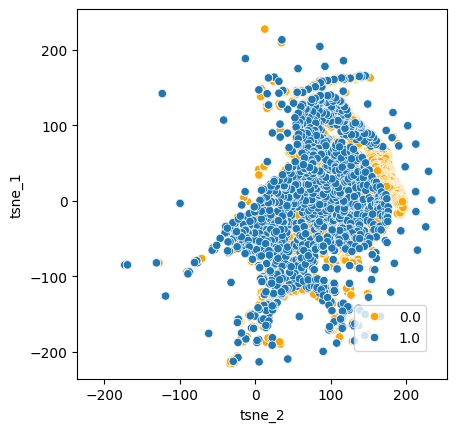

In [ ]:
color_dict = {
    '0.0': 'orange',
    '1.0': '#1f77b4'
}

ax = plt.gca()

sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, palette=color_dict, ax=ax)

sns.kdeplot(data=tsne_result_df[tsne_result_df['label'] == 1], x='tsne_1', y='tsne_2', levels=5, color='orange', linewidths=1.5)
sns.kdeplot(data=tsne_result_df[tsne_result_df['label'] == 0], x='tsne_1', y='tsne_2', levels=5, color='#1f77b4', linewidths=1.5)

lim = (tsne_result.min()-20, tsne_result.max()+20)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(0.75, 0.2), loc=2, borderaxespad=0.0)

# plt.show()
# plt.savefig(f'tsne-dataset-1.pdf', format='pdf', bbox_inches='tight')

In [44]:
tsne_result_df.groupby(['label']).count()

,tsne_1,tsne_2
label,,
0.0,31858,31858
1.0,6149,6149


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    tsne_result, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

In [8]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(filtered_df.iloc[:, 3:len(list(filtered_df.columns))-1], )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=filtered_df.iloc[:, len(list(filtered_df.columns))-1].astype(str), labels={'color': 'veracity'},
    color_discrete_sequence=['blue', 'yellow']
)
fig.update_traces(marker_size=8)
# fig.show()

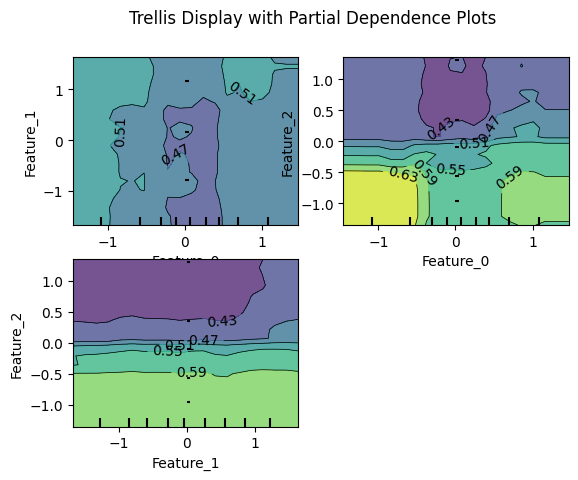

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Step 1: Create or load a dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)

# Step 2: Train a model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 3: Plot Partial Dependence with a Trellis Display
# Specify the features for the trellis display
# Here we choose to plot Feature_0, Feature_1, and Feature_2
features_to_plot = [(0, 1), (0, 2), (1, 2)]

# Using `PartialDependenceDisplay.from_estimator` to create the trellis display
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features_to_plot,
    kind="average",  # or "individual" for individual PDPs
    grid_resolution=20,
    n_cols=2  # Specify number of columns in the trellis grid
)

# Show the plot
import matplotlib.pyplot as plt
plt.suptitle("Trellis Display with Partial Dependence Plots")
plt.show()


# load from Pickle

In [ ]:
import pickle

prefix = '../datasets-for-exp/RQ3Final2/RQ3Final2_'


with open(prefix + 'x_train_val.pickle', "rb") as file:
    X_train_val = pickle.load(file)

with open(prefix + 'y_train_val.pickle' , "rb") as file:
    y_train_val = pickle.load(file)

with open(prefix + 'x_test.pickle',  "rb") as file:
    X_test = pickle.load(file)

with open(prefix + 'y_test.pickle',  "rb") as file:
    y_test = pickle.load(file)


# drop them only for fibvid 
# X_train_val.drop(['strongly_cc', 'size_of_scc', 'weakly_cc', 'avg_cluster_coef'], axis=1, inplace=True)
# X_test.drop(['strongly_cc', 'size_of_scc', 'weakly_cc', 'avg_cluster_coef'], axis=1, inplace=True)
# X_train_val = X_train_val.iloc[:, 1:len(list(X_train_val))]
# X_test = X_test.iloc[:, 1:len(list(X_test))]


# for vosoughi run this
# X_train_val.drop(['strongly_cc', 'size_of_scc'], axis=1, inplace=True)
# X_test.drop(['strongly_cc', 'size_of_scc'], axis=1, inplace=True)


# X_train_val.shape, y_train_val.shape, X_test.shape, y_test.shape
# X_train_val[X_train_val['characteristic_distance'] == 0].shape[0] + X_test[X_test['characteristic_distance'] == 0].shape[0]
X_train_val


,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
1428,3.0,282.0,98.0,0.011951,0.003546,2.088889,4.859974,2.725997
120,1.0,284.0,284.0,0.003521,0.003521,1.000000,8.441024,249.999966
412,3.0,546.0,287.0,0.007709,0.001832,2.539216,4.768435,4.701826
609,3.0,829.0,476.0,0.005405,0.001206,3.460784,4.297152,5.536416
1304,1.0,323.0,323.0,0.003096,0.003096,1.000000,9.000043,249.999966
...,...,...,...,...,...,...,...,...
1017,3.0,814.0,466.0,0.005505,0.001229,3.551020,4.466691,5.559141
192,1.0,266.0,266.0,0.003759,0.003759,1.000000,8.170125,249.999966
1237,3.0,521.0,276.0,0.008150,0.001919,2.692308,4.514686,4.772694
339,3.0,294.0,192.0,0.007975,0.003401,2.920000,4.332869,0.660538


In [21]:
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=5)

for train_index, val_index in skf.split(X_train_val.to_numpy(), y_train_val.to_numpy()):
    print(len(train_index))

176
177
177
177
177


,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
321,1.0,7.0,7.0,0.142857,0.142857,1.000000,1.428869,6.566261
319,1.0,27.0,27.0,0.037037,0.037037,1.000000,2.647568,27.774778
51,2.0,100.0,97.0,0.010606,0.010000,1.030928,4.876811,0.571625
488,2.0,102.0,98.0,0.010580,0.009804,1.040816,4.879310,0.614072
1757,1.0,109.0,109.0,0.009174,0.009174,1.000000,5.244265,124.999346
...,...,...,...,...,...,...,...,...
1133,2.0,103.0,101.0,0.010089,0.009709,1.019802,5.001739,0.511727
1418,1.0,26.0,26.0,0.038462,0.038462,1.000000,2.600000,24.996666
1702,3.0,182.0,107.0,0.013509,0.005495,2.646154,4.470515,1.087474
288,1.0,6.0,6.0,0.166667,0.166667,1.000000,1.341641,5.540523


In [51]:
X_train_val.columns

Index(['depth', 'size', 'max_breadth', 'virality', 'density', 'layer_ratio',
       'structural_heterogeneity', 'characteristic_distance'],
      dtype='object')

In [53]:
with open(prefix + "x_train_val.pickle", "wb") as file:
    pickle.dump(X_train_val, file)

with open(prefix + "y_train_val.pickle", "wb") as file:
    pickle.dump(y_train_val, file)

with open(prefix + "x_test.pickle", "wb") as file:
    pickle.dump(X_test, file)

with open(prefix + "y_test.pickle", "wb") as file:
    pickle.dump(y_test, file)

In [15]:
# vosoughi ratio 
(0.8382360679892649, 0.16179024364574016) 4.19:0.81, 
# fibvid ratio
(0.7829787234042553, 0.2170212765957447) 3.132:0.868

0.9

In [4]:
X_train_val.columns

Index(['depth', 'size', 'max_breadth', 'virality', 'strongly_cc',
       'size_of_scc', 'density', 'layer_ratio', 'structural_heterogeneity',
       'characteristic_distance'],
      dtype='object')

In [70]:
X_train_val = X_train_val.iloc[:, 2:len(list(X_test))]

In [52]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from copy import copy

normalized_df = copy(X_train_val)

# run this for vosoughi only
# cd_first_quantile = np.quantile(normalized_df['characteristic_distance'], 0.25)
# cd_third_quantile = np.quantile(normalized_df['characteristic_distance'], 0.75)
# normalized_df['characteristic_distance'] = np.log(normalized_df['characteristic_distance'] + cd_first_quantile**2/cd_third_quantile)

normalized_df['characteristic_distance'] = np.log(normalized_df['characteristic_distance'])

# scaler = StandardScaler().set_output(transform="pandas")
# scaled_X_train = scaler.fit_transform(normalized_df)


C:\Users\siddiquee\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
np.log(0)

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_11272\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [58]:
X_train_val[X_train_val['characteristic_distance'] == 0].shape


(360, 8)

In [67]:
X_train_val

,category,unique_user_count,depth,size,max_breadth,virality,density,layer_ratio,structural_heterogeneity,characteristic_distance
786,covid_false,148,0.006757,1.013514,1.013514,0.000045,0.000045,0.006757,0.041515,0.844590
507,covid_false,16,0.125000,1.000000,0.812500,0.005469,0.003906,0.076923,0.109924,0.074490
433,covid_false,73,0.027397,1.000000,0.931507,0.000214,0.000188,0.014706,0.054994,0.010185
892,covid_false,16,0.062500,1.000000,1.000000,0.003906,0.003906,0.062500,0.129099,0.976229
492,covid_false,12,0.083333,1.000000,1.000000,0.006944,0.006944,0.083333,0.150756,0.946358
...,...,...,...,...,...,...,...,...,...,...
266,covid_true,103,0.038835,1.058252,0.990291,0.000109,0.000089,0.010185,0.047700,0.007675
640,covid_false,118,0.025424,1.000000,0.822034,0.000203,0.000072,0.056830,0.039321,0.008030
684,covid_false,661,0.004539,1.049924,0.844175,0.000012,0.000002,0.015827,0.006897,0.021997
1549,non_covid_false,144,0.020833,1.027778,0.708333,0.000079,0.000047,0.009872,0.029841,0.005443


# Data cleaning

In [14]:
filtered_df

,cascade_root_id,category,unique_user_count,depth,size,max_breadth,virality,strongly_cc,weakly_cc,size_of_scc,avg_cluster_coef,density,layer_ratio,structural_heterogeneity,characteristic_distance,veracity
0,1288771853822103552,covid_true,6,2.0,7.0,6.0,0.190476,7.0,1.0,7.0,0.0,0.142857,1.166667,1.285604,1.024628,1.0
1,1251209120528637952,covid_true,140,1.0,142.0,142.0,0.007042,142.0,1.0,142.0,0.0,0.007042,1.000000,5.979279,124.999346,1.0
3,1262244018198441984,covid_true,17,2.0,20.0,17.0,0.065789,20.0,1.0,20.0,0.0,0.050000,1.176471,2.004151,1.051074,1.0
4,1273140209090203651,covid_true,119,2.0,121.0,102.0,0.010882,121.0,1.0,121.0,0.0,0.008264,1.186275,4.690253,1.079731,1.0
6,1238225647299964928,covid_true,14,1.0,14.0,14.0,0.071429,14.0,1.0,14.0,0.0,0.071429,1.000000,1.941451,13.151559,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,1225294960087486464,non_covid_false,107,2.0,107.0,99.0,0.010756,107.0,1.0,107.0,0.0,0.009346,1.080808,4.815929,0.756799,0.0
1770,1248416686220300298,non_covid_false,22,1.0,22.0,22.0,0.045455,22.0,1.0,22.0,0.0,0.045455,1.000000,2.400397,20.829333,0.0
1771,1224930570985144322,non_covid_false,27,1.0,31.0,31.0,0.032258,31.0,1.0,31.0,0.0,0.032258,1.000000,2.829900,31.247336,0.0
1772,1273769391461560320,non_covid_false,78,2.0,78.0,70.0,0.015485,78.0,1.0,78.0,0.0,0.012821,1.114286,4.006236,0.877097,0.0


In [ ]:
import pandas as pd
from matplotlib.cbook import boxplot_stats

d = [boxplot_stats(X_train_val[col].dropna().values)[0] for col in X_train_val.columns]
s = pd.DataFrame(d, index=X_train_val.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
s["min"]=round(X_train_val.min(), 2)
s["max"]=round(X_train_val.max(), 2)
s["mean"]=round(X_train_val.mean(), 2)
s["median"]=round(X_train_val.median(), 2)
s["var"]=round(X_train_val.var(), 2)
s["std"]=round(X_train_val.std(), 2)
s

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_15264\3081249858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_val.drop(['strongly_cc', 'size_of_scc', 'weakly_cc', 'avg_cluster_coef'], axis=1, inplace=True)


,whishi,whislo,q1,med,q3,min,max,mean,median,var,std
depth,3.00,1.0,1.00,1.00,2.00,1.0,2.400000e+01,1.71,1.00,1.770000e+00,1.33
size,19.00,2.0,2.00,4.00,9.00,2.0,4.689500e+04,96.26,4.00,9.595741e+05,979.58
max_breadth,17.00,2.0,2.00,3.00,8.00,2.0,2.952700e+04,60.42,3.00,2.926575e+05,540.98
virality,1.03,0.0,0.14,0.33,0.50,0.0,1.030000e+00,0.31,0.33,4.000000e-02,0.19
density,0.50,0.0,0.11,0.25,0.50,0.0,5.000000e-01,0.27,0.25,3.000000e-02,0.18
layer_ratio,1.54,1.0,1.00,1.00,1.22,1.0,1.300000e+01,1.17,1.00,1.600000e-01,0.40
structural_heterogeneity,2.07,1.0,1.00,1.12,1.43,1.0,7.890000e+01,1.80,1.12,7.960000e+00,2.82
characteristic_distance,3.99,0.0,1.44,1.44,2.47,0.0,1.323516e+10,348232.07,1.44,4.608876e+15,67888700.46


C:\Users\siddiquee\AppData\Local\Temp\ipykernel_15264\29902307.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=30)


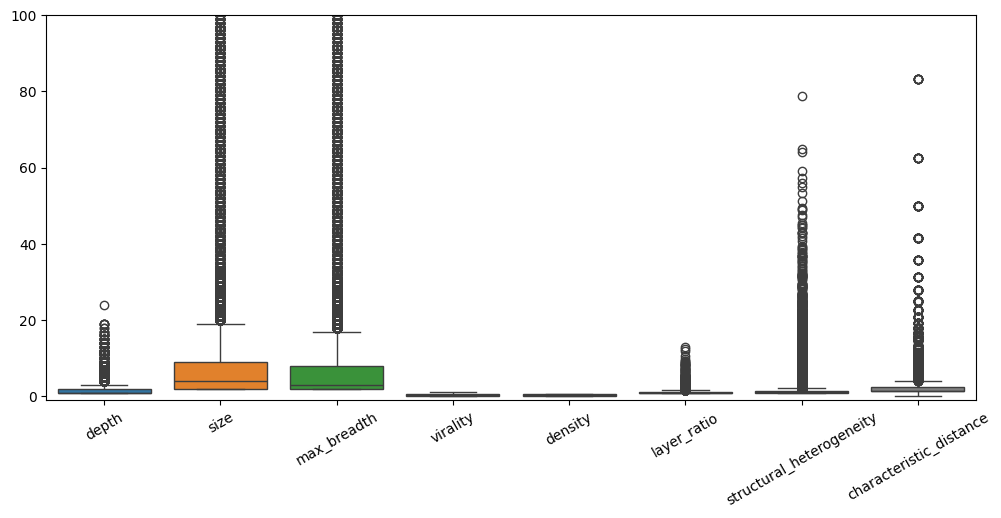

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.cbook import boxplot_stats

d = [boxplot_stats(X_train_val[col].dropna().values)[0] for col in X_train_val.columns]
s = pd.DataFrame(d, index=X_train_val.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# sns.set(rc={'figure.figsize':(15, 10)})

fig, ax = plt.subplots(figsize=(12, 5))
ax.set(ylim=(-1, 5000))
# directly plot the wide dataframe with only the total_bill data
box_plot = sns.boxplot(data=X_train_val, ax=ax)

box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=30)

plt.savefig(prefix + 'box_plot_before.pdf', format='pdf', bbox_inches='tight')

In [19]:
# https://aosmith.rbind.io/2018/09/19/the-log-0-problem/

import numpy as np
from sklearn.preprocessing import StandardScaler
from copy import copy

normalized_df = copy(X_train_val)

# run this for vosoughi only
# cd_first_quantile = np.quantile(normalized_df['characteristic_distance'], 0.25)
# cd_third_quantile = np.quantile(normalized_df['characteristic_distance'], 0.75)
# normalized_df['characteristic_distance'] = np.log(normalized_df['characteristic_distance'] + cd_first_quantile**2/cd_third_quantile)

# normalized_df['depth'] = np.log(normalized_df['depth'])
normalized_df['size'] = np.log(normalized_df['size'])
normalized_df['max_breadth'] = np.log(normalized_df['max_breadth'])
# normalized_df['virality'] = np.log(normalized_df['virality'])
# normalized_df['density'] = np.log(normalized_df['density'])
# normalized_df['layer_ratio'] = np.log(normalized_df['layer_ratio'])
# normalized_df['structural_heterogeneity'] = np.log(normalized_df['structural_heterogeneity'])
# normalized_df['characteristic_distance'] = np.log(normalized_df['characteristic_distance'])

# normalized_df = normalized_df.drop(columns=['strongly_cc'], axis=1) 
# normalized_df = normalized_df.drop(['size_of_scc'], axis=1)

scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(normalized_df)
# normalized_df

In [22]:
import pandas as pd
from matplotlib.cbook import boxplot_stats

d = [boxplot_stats(scaled_X_train[col].dropna().values)[0] for col in scaled_X_train.columns]
s = pd.DataFrame(d, index=scaled_X_train.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
s["min"]=round(scaled_X_train.min(), 2)
s["max"]=round(scaled_X_train.max(), 2)
s["mean"]=round(scaled_X_train.mean(), 2)
s["median"]=round(scaled_X_train.median(), 2)
s["var"]=round(scaled_X_train.var(), 2)
s["std"]=round(scaled_X_train.std(), 2)
s

,whishi,whislo,q1,med,q3,min,max,mean,median,var,std
depth,1.16,-0.81,-0.81,-0.81,0.18,-0.81,4.12,0.0,-0.81,1.0,1.0
size,2.71,-2.35,-0.77,0.15,0.65,-2.35,3.54,0.0,0.15,1.0,1.0
max_breadth,2.55,-2.48,-0.77,0.20,0.58,-2.48,3.31,0.0,0.20,1.0,1.0
virality,1.09,-0.66,-0.53,-0.43,0.14,-0.66,6.24,0.0,-0.43,1.0,1.0
density,0.92,-0.63,-0.53,-0.43,0.11,-0.63,6.35,-0.0,-0.43,1.0,1.0
layer_ratio,0.04,-0.34,-0.34,-0.34,-0.19,-0.34,12.45,-0.0,-0.34,1.0,1.0
structural_heterogeneity,2.55,-1.44,-0.83,0.07,0.53,-1.44,6.24,-0.0,0.07,1.0,1.0
characteristic_distance,1.51,-2.11,-0.77,-0.13,0.54,-2.11,8.74,-0.0,-0.13,1.0,1.0


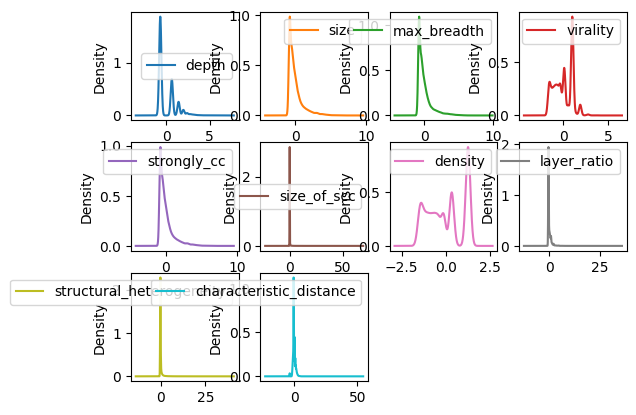

In [12]:
import matplotlib.pyplot as plt
scaled_X_train.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_3872\125237508.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=30)


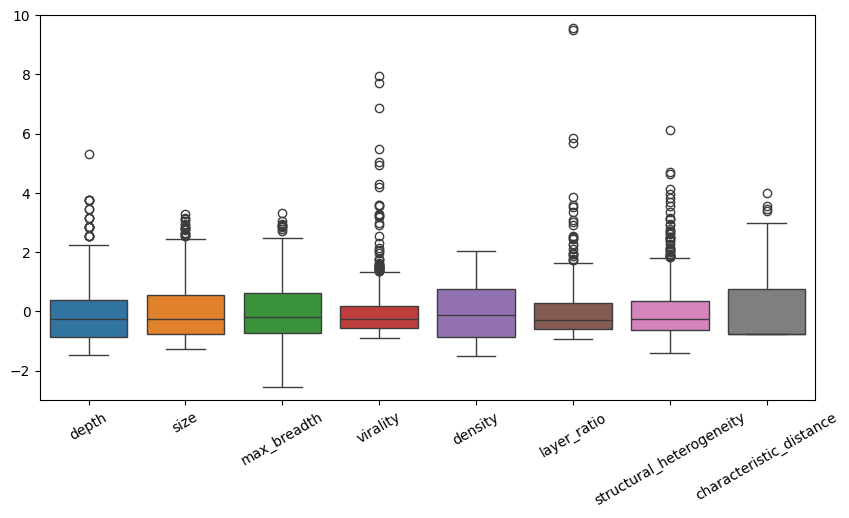

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.cbook import boxplot_stats

d = [boxplot_stats(scaled_X_train[col].dropna().values)[0] for col in scaled_X_train.columns]
s = pd.DataFrame(d, index=scaled_X_train.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)

# sns.set(rc={'figure.figsize':(15, 10)})

fig, ax = plt.subplots(figsize=(10, 5))
ax.set(ylim=(-3, 10))
# directly plot the wide dataframe with only the total_bill data
box_plot = sns.boxplot(data=scaled_X_train, ax=ax)

box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=30)

plt.savefig(prefix + 'box_plot_after.pdf', format='pdf', bbox_inches='tight')

In [ ]:
s.drop(['mean', 'Var'], axis=1, inplace=True)
# s["mean"]=scaled_X_train.mean()
# s["Var"]=scaled_X_train.var()


# plot

fig, ax = plt.subplots(figsize=(12, 5))
ax.set(ylim=(-2, 8))
# directly plot the wide dataframe with only the total_bill data
box_plot = sns.boxplot(data=scaled_X_train, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=30)

# same plot is created with the primary tips dataframe
# box_plot = sns.boxplot(x="day", y="total_bill", data=tips, ax=ax)

# annotate
for xtick in box_plot.get_xticks():
    for col in s.columns:
        box_plot.text(xtick, s[col][xtick], s[col][xtick], horizontalalignment='left', size='medium', color='k', weight='semibold', bbox=dict(facecolor='lightgray'))


In [ ]:
columns = ['cascade_id','depth','size','max_breadth','virality','strongly_cc','weakly_cc','size_of_scc','avg_cluster_coef','density','layer_ratio','structural_heterogeneity','characteristic_distance','veracity']
vosoughi_df[vosoughi_df.virality.isna() == True][columns].to_csv('./trial.csv', sep=',', encoding='utf-8')


In [6]:
filtered_df[filtered_df.virality.isna() == False]

,cascade_root_id,cascade_id,time_bucket,depth,size,max_breadth,virality,strongly_cc,weakly_cc,size_of_scc,avg_cluster_coef,density,layer_ratio,structural_heterogeneity,characteristic_distance,veracity
50748,666884.0,50748.0,4034725.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,0.0
50749,666886.0,50749.0,4034725.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,0.0
50750,666889.0,50750.0,4034725.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,0.0
50751,666891.0,50751.0,4034725.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,0.0
50752,666893.0,50752.0,4034725.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,4022213.0,88733.0,4034735.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,1.0
6145,4022215.0,88734.0,4034735.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,1.0
6146,4022217.0,88735.0,4034735.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,1.0
6147,4022219.0,88736.0,4034735.0,1.0,2.0,2.0,0.5,2.0,1.0,2.0,0.0,0.5,1.0,1.0,1.439579,1.0


# Feature Selection

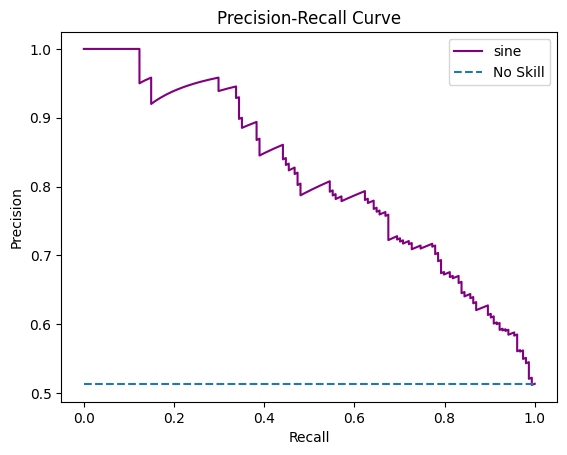

In [38]:
import io
from PIL import Image
import os
import wandb
import matplotlib.pyplot as plt
#calculate precision and recall

# os.environ["WANDB_API_KEY"] = "b21f4406f3966154b12e98de3bef934216952a54"
# os.environ["WANDB_ENTITY"]="istiyaksiddiquee"
# wandb.init(project="my-scikit-integration")

precision, recall, thresholds = precision_recall_curve(y_test, y_score)
y_test
no_skill = len(y_test[y_test==1]) / len(y_test)

#create precision recall curve
fig, ax = plt.subplots()

ax.plot(recall, precision, color='purple', label="sine")
ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend()
plt.show()
#display plot
# wandb.log({"PRC-2": fig})

# # plt.savefig('PR-test.jpeg')


# img_buf = io.BytesIO()
# plt.savefig(img_buf, format='png')

# im = Image.open(img_buf)
# # im.show(title="My Image")
# wandb.log({"example-2": wandb.Image(im)})
# img_buf.close()

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import numpy as np
import pandas as pd

# Sample data
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Original column order
original_columns = df.columns.tolist()

# Define transformers
scaler = StandardScaler()

class CustomFunctionTransformer(FunctionTransformer):
    def get_feature_names_out(self, input_features=None):
        return input_features

log_norm_custom = CustomFunctionTransformer(func=np.log)

# ColumnTransformer definition
ct = ColumnTransformer([
    ('log_norm', log_norm_custom, ['C']),
    ('scale', scaler, ['A', 'B'])
])

# Apply ColumnTransformer
transformed_array = ct.fit_transform(df)

# Get feature names from the ColumnTransformer
transformed_columns = ct.get_feature_names_out()

# Convert ndarray to DataFrame with correct column names
transformed_df = pd.DataFrame(transformed_array, columns=transformed_columns)

print("Transformed DataFrame:")
print(transformed_df)

Transformed DataFrame:
   log_norm__C  scale__A  scale__B
0     1.945910 -1.224745 -1.224745
1     2.079442  0.000000  0.000000
2     2.197225  1.224745  1.224745


In [15]:
transformed_df[['scale__A', 'scale__B', 'log_norm__C', ]]  # New order: C, A, B

,scale__A,scale__B,log_norm__C
0,-1.224745,-1.224745,1.945910
1,0.000000,0.000000,2.079442
2,1.224745,1.224745,2.197225


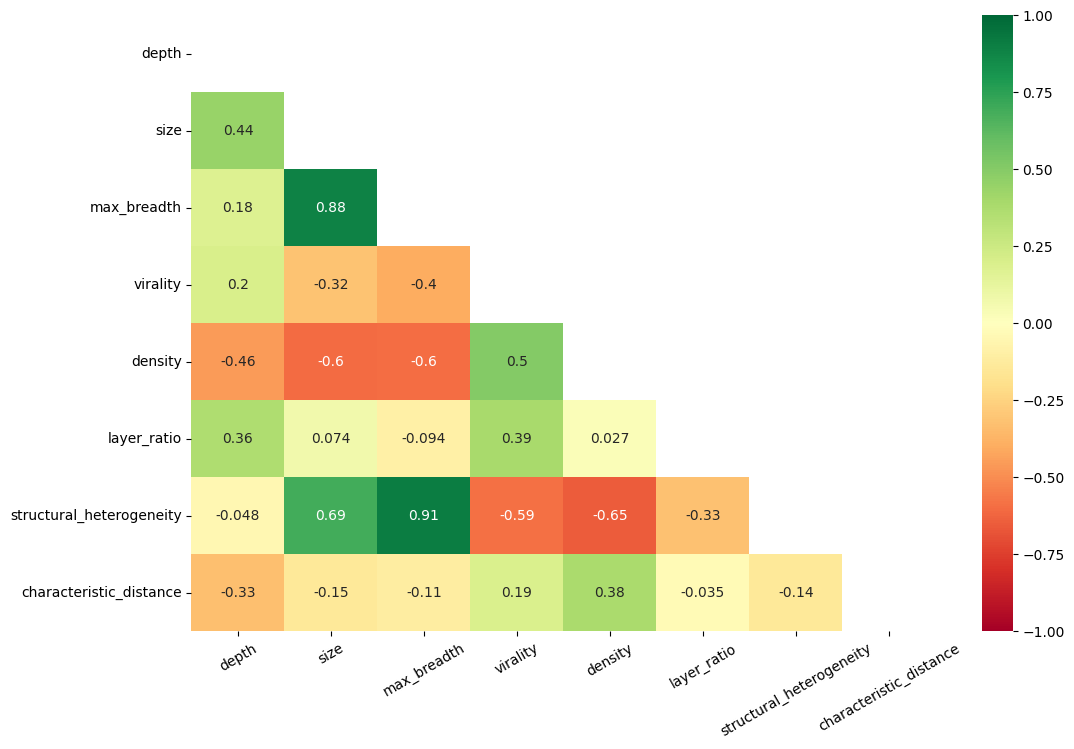

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(X_train_val.corr(), dtype=bool))
sns.heatmap(X_train_val.corr(method='pearson', numeric_only = True), annot=True, mask=mask, vmin=-1, vmax=1, cmap ='RdYlGn')
plt.xticks(rotation=30) 
plt.savefig(prefix + 'pearson_all_features.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)

In [25]:
# load statmodels functions
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# compute the vif for all given features
def compute_vif(df, considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = list(scaled_X_train.columns)
considered_features.remove('max_breadth')
# considered_features.remove('virality')

# considered_features.remove('density')
# considered_features.remove('structural_heterogeneity')
# considered_features.remove('size')
# considered_features.remove('size_of_scc')

# compute vif 
compute_vif(scaled_X_train, considered_features).sort_values('VIF', ascending=False)

C:\Users\siddiquee\AppData\Local\Temp\ipykernel_3872\4021795413.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
2,density,3.826172
4,structural_heterogeneity,2.559439
0,depth,2.280601
1,virality,2.148290
3,layer_ratio,1.368507
5,characteristic_distance,1.244892


In [26]:
scaled_X_train.columns

Index(['depth', 'size', 'max_breadth', 'virality', 'density', 'layer_ratio',
       'structural_heterogeneity', 'characteristic_distance'],
      dtype='object')

In [33]:
prefix

'../datasets-for-exp/RQ4Final1/RQ4Final1_'

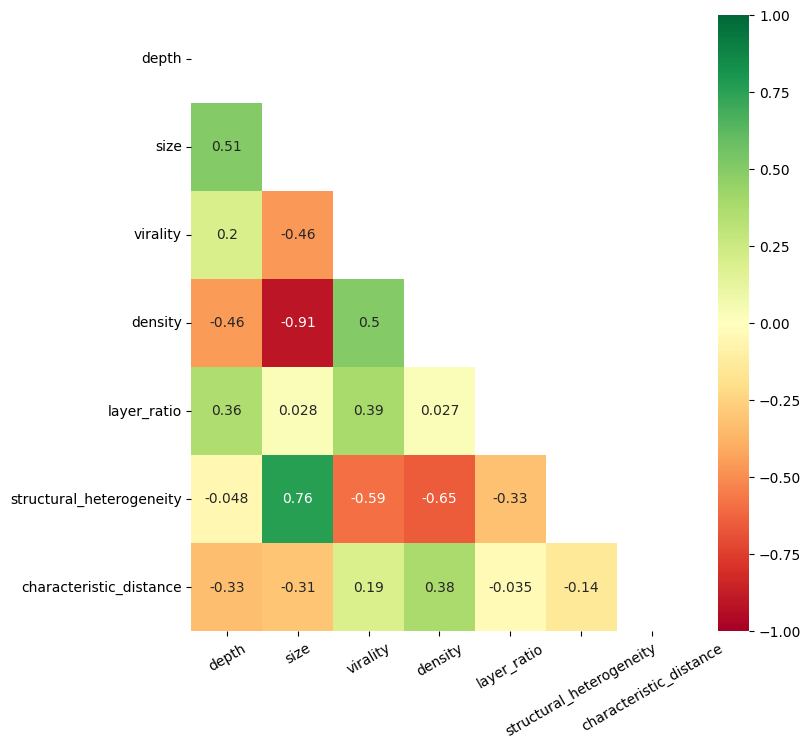

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['depth', 'size', 'virality', 'density', 'layer_ratio', 'structural_heterogeneity', 'characteristic_distance']
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(scaled_X_train[columns].corr(), dtype=bool))
sns.heatmap(scaled_X_train[columns].corr(method='pearson', numeric_only = True), annot=True, mask=mask, vmin=-1, vmax=1, cmap ='RdYlGn')
plt.xticks(rotation=30) 
plt.savefig(prefix + 'pearson_selected_features.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression

scaler = StandardScaler()
scaler.fit(scaled_X_train[columns])
sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(scaled_X_train[columns]), y_train_val)
removed_feats = scaled_X_train[columns].columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['density', 'structural_heterogeneity'], dtype='object')

In [29]:
columns

['depth',
 'size',
 'virality',
 'density',
 'layer_ratio',
 'structural_heterogeneity',
 'characteristic_distance']

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=len(columns)-1, step=1, verbose=5)
rfe_selector.fit(scaled_X_train[columns], y_train_val)
rfe_support = rfe_selector.get_support()
rfe_feature = scaled_X_train[columns].loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 7 features.
6 selected features
['size', 'virality', 'density', 'layer_ratio', 'structural_heterogeneity', 'characteristic_distance']


c:\Program Files\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    

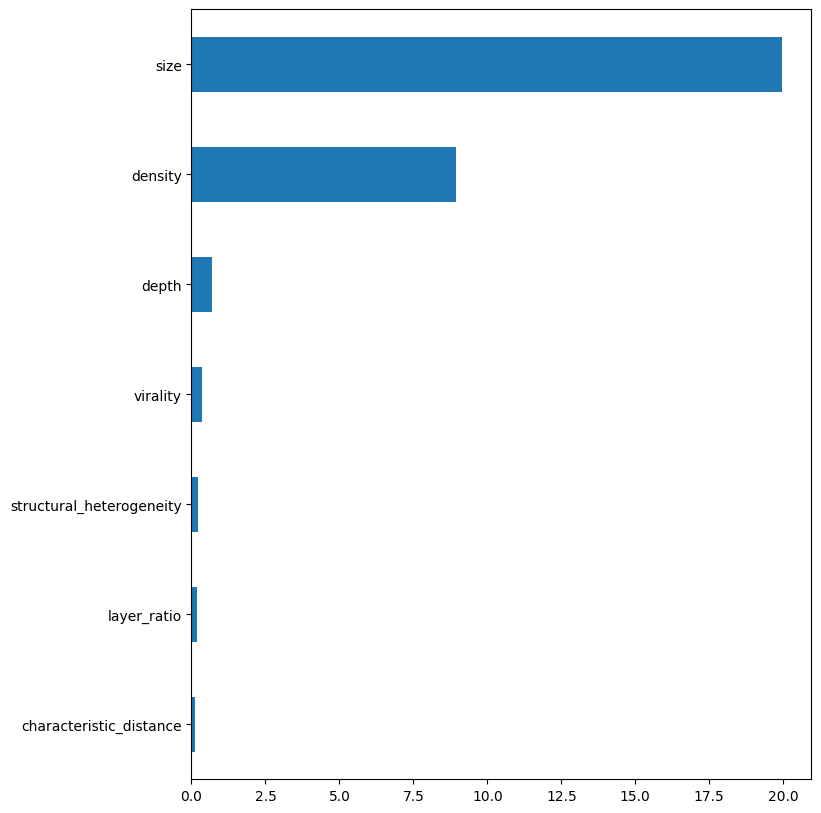

In [31]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib
import pandas as pd 

clf_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [_ for _ in range(1, 10, 1)],
    "dual": [True, False],
}

model = LogisticRegression()

clf = GridSearchCV(
    estimator=model,
    cv=5,
    refit="average_precision_score",
    param_grid=clf_grid,
    scoring='average_precision',
    n_jobs=-1,
)

clf.fit(scaled_X_train[columns].values, y_train_val.values)
coefficients = np.abs(clf.best_estimator_.coef_)

coef = pd.Series(coefficients[0], index = scaled_X_train[columns].columns)
coef = pd.concat([coef.sort_values().head(10)])


matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh")
# plt.title("Coefficients in the Logistic Model")
plt.savefig(prefix + 'logistic_feature.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)

c:\Program Files\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+01, tolerance: 3.657e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

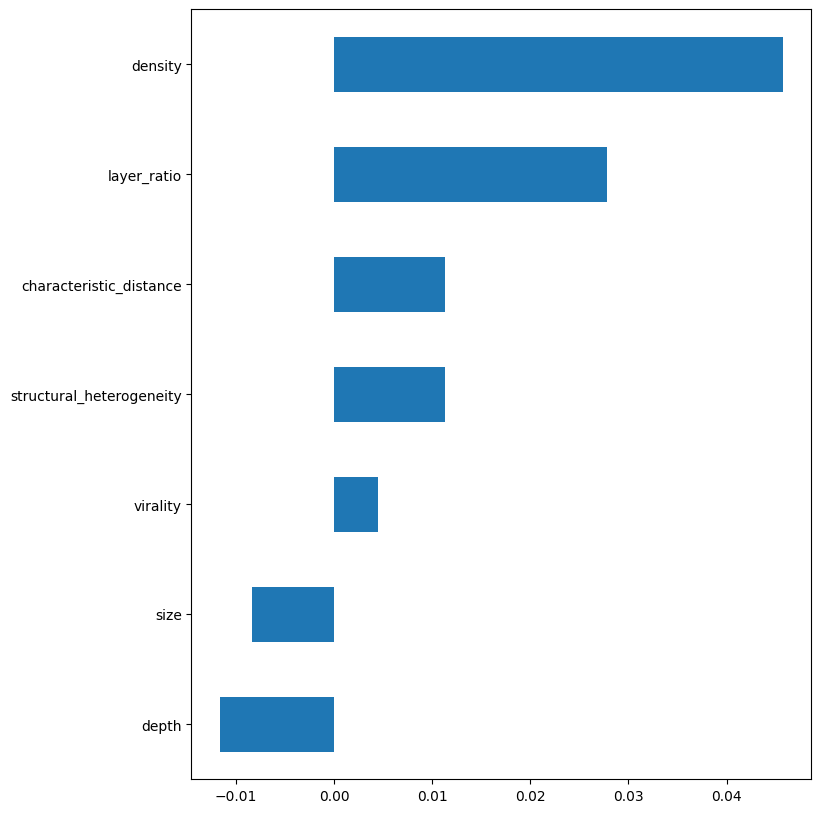

In [32]:
from sklearn.linear_model import ElasticNet
import matplotlib
import matplotlib.pyplot as plt
from numpy import arange

grid = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    'l1_ratio': arange(0, 1, 0.1)
}

model = ElasticNet()

clf = GridSearchCV(
    estimator=model,
    cv=5,
    refit="average_precision_score",
    param_grid=grid,
    scoring='average_precision',
    n_jobs=-1,
)

clf.fit(scaled_X_train[columns], y_train_val)

coef = pd.Series(clf.best_estimator_.coef_, index = scaled_X_train[columns].columns)
imp_coef = pd.concat([coef.sort_values().head(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Elastic Net Model")
plt.savefig(prefix + 'elastic_feature.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)

In [33]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
rfc = RandomForestClassifier()
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1, max_iter=100)
boruta_selector.fit(np.array(scaled_X_train[columns]), np.array(y_train_val)) 

selected_rf_features = pd.DataFrame({'Feature':list(scaled_X_train[columns].columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	3
Iteration: 	17 / 

,Feature,Ranking
3,density,1
1,size,2
5,structural_heterogeneity,3
2,virality,4
4,layer_ratio,4
6,characteristic_distance,6
0,depth,7


In [35]:
print (boruta_selector.n_features_)

0


In [ ]:
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

In [ ]:
considered_features = ['max_breadth', 'density', 'virality', 'depth', 'structural_heterogeneity', 'characteristic_distance', 'size_of_scc', 'layer_ratio']

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
 
# To scale data
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
features = load_diabetes()['feature_names']
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_

importance = np.abs(coefficients)
np.array(features)[importance > 0]
np.array(features)[importance == 0]

In [3]:
import numpy as np

lgb_grid = {
        "max_depth": [_ for _ in np.arange(1, 10+3, 3)],
        "lambda_l1": [_ for _ in np.arange(1, 10+2, 2)],
        "lambda_l2": [_ for _ in np.arange(1, 10+2, 2)],
        "num_leaves": [_ for _ in np.arange(50, 80+15, 15)],
        "learning_rate": [_ for _ in np.arange(0.1, 1+0.1, 0.2)],
        "min_data_in_leaf": [_ for _ in np.arange(50, 250+50, 50)],
        "min_gain_to_split": [_ for _ in np.arange(0.1, 1+0.2, 0.2)],
}

from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(lgb_grid)
len(pg)

64800

In [6]:
len([_ for _ in np.arange(1, 30 + 5, 5)])

7

In [6]:
import numpy as np
xgb_grid = {   
        # "gamma": [_ for _ in np.arange(0.1, 1+0.1, 0.1)],
        "subsample": [_ for _ in np.arange(0.2, 1 + 0.2, 0.2)],
        "max_depth": [_ for _ in np.arange(1, 30 + 10, 10)],
        "reg_alpha": [_ for _ in np.arange(1, 10 + 2, 2)],
        "reg_lambda": [_ for _ in np.arange(1, 10 + 2, 2)],
        "n_estimators": [_ for _ in np.arange(100, 250+50, 50)],
        "learning_rate": [_ for _ in np.arange(0.1, 1 + 0.2, 0.2)],
        # "colsample_bytree": [_ for _ in np.arange(0.2, 0.9+0.1, 0.1)],
        "min_child_weight": [_ for _ in np.arange(1, 7+2, 2)],
}

from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(xgb_grid)
len(pg)

69120

In [1]:
import numpy as np
len([_ for _ in np.arange(0.005, 0.1+0.01, 0.01)])

11

In [8]:
dt_grid = {
    "max_depth": [_ for _ in np.arange(1, 40 + 5, 5)],
    "max_features": ['sqrt', 'log2'],
    "min_samples_split": [_ for _ in np.arange(1, 40 + 5, 5)],
    "min_samples_leaf": [_ for _ in np.arange(1, 30 + 5, 5)],
    "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.01, 0.01)]
}

len(ParameterGrid(dt_grid))


12474

In [18]:
len([_ for _ in np.arange(1, 40 + 1, 1)])

40

In [11]:
len([_ for _ in np.arange(2, 30 + 5, 5)])

7

In [11]:
rf_grid = {
    "max_depth": [_ for _ in np.arange(1, 50 + 10, 10)],
    "n_estimators": [_ for _ in np.arange(50, 500 + 100, 100)],
    "max_features": ['sqrt', 'log2'], 
    "min_samples_leaf": [_ for _ in np.arange(1, 30 + 5, 5)],
    "min_samples_split": [_ for _ in np.arange(2, 30 + 5, 5)],
    "criterion": ["gini", "entropy", "log_loss"],
    "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.02, 0.02)]
}

len(ParameterGrid(rf_grid))

63504

In [6]:
logit_grid = {
            "penalty": ["l1", "l2", "elasticnet"],
            "dual": [True, False],
            "C": [_ for _ in range(1, 11, 1)],
            "fit_intercept": [True, False],
            "max_iter": [500],
            "solver": ["lbfgs", "newton-cg", "sag", "saga"],
            "n_jobs": [-1],
        }

from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(logit_grid)
len(pg)

480

In [4]:
for i in range(1, 11, 1):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [1]:
import pickle
file_path = './image'
with open(file_path + "/x_train_val.pickle", "rb") as file:
    X_train_val = pickle.load(file)
    
X_train_val.shape

(32305, 8)

In [2]:
X_train_val

,depth,max_breadth,virality,size_of_scc,density,layer_ratio,structural_heterogeneity,characteristic_distance
76742,2.0,15.0,0.076316,20.0,0.050000,1.333333,1.807954,1.444840
65438,1.0,4.0,0.250000,4.0,0.250000,1.000000,1.154701,3.497332
77936,3.0,12.0,0.104575,18.0,0.055556,1.416667,1.578401,1.031867
62375,1.0,3.0,0.333333,3.0,0.333333,1.000000,1.060660,2.466303
67452,1.0,5.0,0.200000,5.0,0.200000,1.000000,1.250000,4.445556
...,...,...,...,...,...,...,...,...
53331,1.0,2.0,0.500000,2.0,0.500000,1.000000,1.000000,1.439579
2282,2.0,2.0,0.666667,3.0,0.333333,1.500000,1.060660,1.819785
64675,1.0,4.0,0.250000,4.0,0.250000,1.000000,1.154701,3.497332
51667,1.0,2.0,0.500000,2.0,0.500000,1.000000,1.000000,1.439579


# DS2

In [7]:
len([_ for _ in np.arange(0.2, 1 + 0.2, 0.2)])

5

In [27]:
xgb_grid = {   
        # "gamma": [_ for _ in np.arange(0.1, 1+0.1, 0.1)],
        # "subsample": [_ for _ in np.arange(0.2, 1 + 0.2, 0.2)],
        "max_depth": [_ for _ in np.arange(1, 30 + 10, 10)],
        # "reg_alpha": [_ for _ in np.arange(1, 10 + 2, 2)],
        "reg_lambda": [_ for _ in np.arange(1, 10 + 2, 2)],
        "n_estimators": [_ for _ in np.arange(100, 250+50, 50)],
        "learning_rate": [_ for _ in np.arange(0.1, 1 + 0.2, 0.2)],
        # "colsample_bytree": [_ for _ in np.arange(0.2, 0.9+0.1, 0.1)],
        "min_child_weight": [_ for _ in np.arange(1, 7+2, 2)],
}


from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(xgb_grid)
len(pg)

2304

In [28]:
xgb_grid = {   
    # "gamma": [_ for _ in np.arange(0.1, 1+0.1, 0.1)],
    # "subsample": [_ for _ in np.arange(0.2, 1 + 0.2, 0.2)],
    "max_depth": [_ for _ in np.arange(1, 10 + 2, 2)],
    # "reg_alpha": [_ for _ in np.arange(1, 10 + 2, 2)],
    "reg_lambda": [_ for _ in np.arange(1, 10 + 2, 2)],
    "n_estimators": [_ for _ in np.arange(100, 300+100, 100)],
    "learning_rate": [_ for _ in np.arange(0.1, 1 + 0.2, 0.2)],
    "min_child_weight": [_ for _ in np.arange(1, 7+2, 2)],
}

from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(xgb_grid)
len(pg)

2592

In [17]:
len([_ for _ in np.arange(0.1, 1+0.3, 0.3)])

4

In [31]:
lgb_grid = {
        "max_depth": [_ for _ in np.arange(1, 10+3, 3)],
        # "lambda_l1": [_ for _ in np.arange(1, 10+2, 2)],
        "lambda_l2": [_ for _ in np.arange(1, 10+3, 3)],
        "num_leaves": [_ for _ in np.arange(50, 80+15, 15)],
        "learning_rate": [_ for _ in np.arange(0.1, 1+0.3, 0.3)],
        "min_data_in_leaf": [_ for _ in np.arange(50, 250+50, 50)],
        "min_gain_to_split": [_ for _ in np.arange(0.1, 1+0.3, 0.3)],
}

from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(lgb_grid)
len(pg)

3840

In [32]:
lgb_grid = {
    "max_depth": [_ for _ in np.arange(1, 10+3, 3)],
    # "lambda_l1": [_ for _ in np.arange(1, 10+2, 2)],
    "lambda_l2": [_ for _ in np.arange(1, 10+3, 3)],
    "num_leaves": [_ for _ in np.arange(50, 80+15, 15)],
    "learning_rate": [_ for _ in np.arange(0.1, 1+0.3, 0.3)],
    "min_data_in_leaf": [_ for _ in np.arange(10, 30+15, 15)],
    "min_gain_to_split": [_ for _ in np.arange(0.1, 1+0.2, 0.2)],
}
from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(lgb_grid)
len(pg)

3456

In [35]:
rf_grid = {
        "max_depth": [_ for _ in np.arange(1, 50 + 15, 15)],
        "n_estimators": [_ for _ in np.arange(50, 500 + 100, 100)],
        # "max_features": ['sqrt', 'log2', None], 
        "min_samples_leaf": [_ for _ in np.arange(1, 30 + 10, 10)],
        "min_samples_split": [_ for _ in np.arange(2, 30 + 5, 5)],
        "criterion": ["entropy"],
        "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.04, 0.04)]
}


from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(rf_grid)
len(pg)

3360

In [36]:
rf_grid = {
        "max_depth": [_ for _ in np.arange(1, 20 + 5, 5)],
        "n_estimators": [_ for _ in np.arange(50, 300 + 100, 100)],
        # "max_features": ['sqrt', 'log2', None], 
        "min_samples_leaf": [_ for _ in np.arange(1, 20 + 5, 5)],
        "min_samples_split": [_ for _ in np.arange(2, 20 + 5, 5)],
        # "criterion": ["entropy"],
        "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.02, 0.02)]
}


from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(rf_grid)
len(pg)

3000

In [38]:
import numpy as np

dt_grid = {
    "max_depth": [_ for _ in np.arange(1, 40 + 10, 10)],
    # "max_features": ['sqrt', 'log2', None],
    "min_samples_split": [_ for _ in np.arange(1, 40 + 5, 5)],
    "min_samples_leaf": [_ for _ in np.arange(1, 30 + 5, 5)],
    "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.02, 0.02)]
}


from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(dt_grid)
len(pg)

1890

In [41]:
dt_grid = {
    "max_depth": [_ for _ in np.arange(1, 20 + 5, 5)],
    # "max_features": ['sqrt', 'log2', None],
    "min_samples_leaf": [_ for _ in np.arange(1, 15 + 3, 3)],
    "min_samples_split": [_ for _ in np.arange(1, 10 + 1, 1)],
    "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.02, 0.02)]
}

from sklearn.model_selection import ParameterGrid

pg = ParameterGrid(dt_grid)
len(pg)

1800

In [2]:
import pickle 
import os 
import pandas

X_train_val_file_name = "./image/x_train_val.pickle"

with open(X_train_val_file_name, "rb") as file:
    X_train_val = pickle.load(file)
    print(len(X_train_val.columns))
    print(X_train_val.columns)


8
Index(['depth', 'max_breadth', 'virality', 'size_of_scc', 'density',
       'layer_ratio', 'structural_heterogeneity', 'characteristic_distance'],
      dtype='object')


In [4]:
import os 

os.getcwd()

'e:\\Fake News Project\\thesis work\\RQ2'

In [46]:
import pandas as pd 

df = pd.read_csv('../../Datasets/FalseNews_Code_Data/data/raw_data_anon.csv')


C:\Users\siddiquee\AppData\Local\Temp\ipykernel_4644\1259487315.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Datasets/FalseNews_Code_Data/data/raw_data_anon.csv')


In [47]:
df.cascade_id.nunique()

126302

In [36]:
result = df.groupby(['cascade_id', 'user_account_age']).size().reset_index(name='cnt')


In [38]:
result[result.cnt >= 10].to_csv('./test.csv')

In [39]:
result[result.cnt > 10]

,cascade_id,user_account_age,cnt
158938,76036,1799.0,22
215788,78923,895.0,22
247840,79696,124.0,11
277767,80183,315.0,14
277768,80183,379.0,13
...,...,...,...
1957770,126301,1315.0,11
1957775,126301,1320.0,12
1957783,126301,1328.0,11
1957962,126301,1507.0,11


In [41]:
result.cnt.max()

263

In [35]:
result.groupby(['cnt'])['cascade_id'].count().to_csv('./same_user_age_count.csv')

In [1]:
import pandas as pd 

df = pd.read_csv('./rq2_fibvid_features.csv')
df

,Unnamed: 0,cascade_root_id,category,depth,size,max_breadth,virality,strongly_cc,weakly_cc,size_of_scc,avg_cluster_coef,density,layer_ratio,structural_heterogeneity,characteristic_distance,veracity
0,0,1288771853822103552,covid_true,2.0,7.0,6.0,0.190476,7.0,1.0,7.0,0.0,0.142857,1.166667,1.285604,1.024628,1.0
1,1,1251209120528637952,covid_true,1.0,142.0,142.0,0.007042,142.0,1.0,142.0,0.0,0.007042,1.000000,5.979279,124.999346,1.0
2,2,1238131956526784512,covid_true,0.0,1.0,1.0,NaN,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,-99999.000000,1.0
3,3,1262244018198441984,covid_true,2.0,20.0,17.0,0.065789,20.0,1.0,20.0,0.0,0.050000,1.176471,2.004151,1.051074,1.0
4,4,1273140209090203651,covid_true,2.0,121.0,102.0,0.010882,121.0,1.0,121.0,0.0,0.008264,1.186275,4.690253,1.079731,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,1769,1225294960087486464,non_covid_false,2.0,107.0,99.0,0.010756,107.0,1.0,107.0,0.0,0.009346,1.080808,4.815929,0.756799,0.0
1770,1770,1248416686220300298,non_covid_false,1.0,22.0,22.0,0.045455,22.0,1.0,22.0,0.0,0.045455,1.000000,2.400397,20.829333,0.0
1771,1771,1224930570985144322,non_covid_false,1.0,31.0,31.0,0.032258,31.0,1.0,31.0,0.0,0.032258,1.000000,2.829900,31.247336,0.0
1772,1772,1273769391461560320,non_covid_false,2.0,78.0,70.0,0.015485,78.0,1.0,78.0,0.0,0.012821,1.114286,4.006236,0.877097,0.0


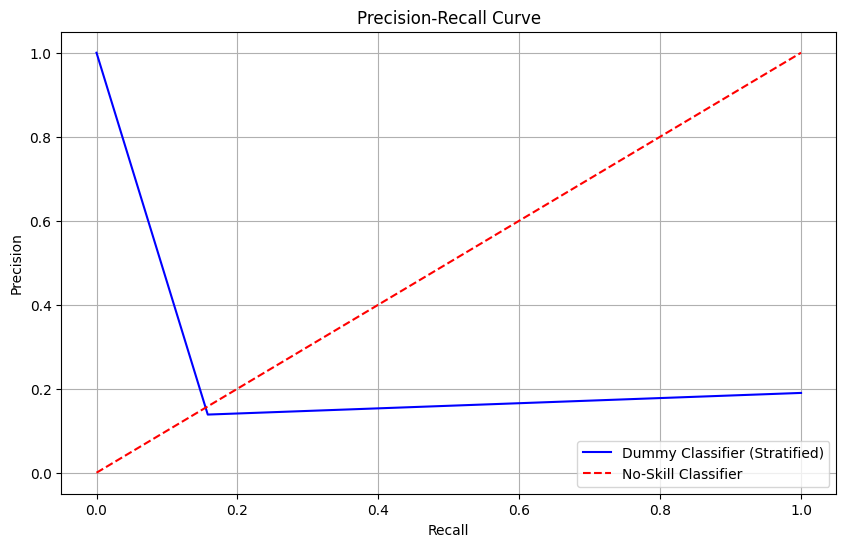

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.dummy import DummyClassifier

# Create an imbalanced dataset with 1:4 ratio
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, 
                           weights=[0.8, 0.2], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
dummy_clf.fit(X_train, y_train)
y_scores_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

precision_dummy, recall_dummy, _ = precision_recall_curve(y_test, y_scores_dummy)

# No-skill classifier (random guessing)
no_skill_precision = np.linspace(0, 1, num=len(recall_dummy))
no_skill_recall = np.linspace(0, 1, num=len(recall_dummy))

plt.figure(figsize=(10, 6))
plt.plot(recall_dummy, precision_dummy, label='Dummy Classifier (Stratified)', color='blue')
plt.plot(no_skill_recall, no_skill_precision, label='No-Skill Classifier', linestyle='--', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

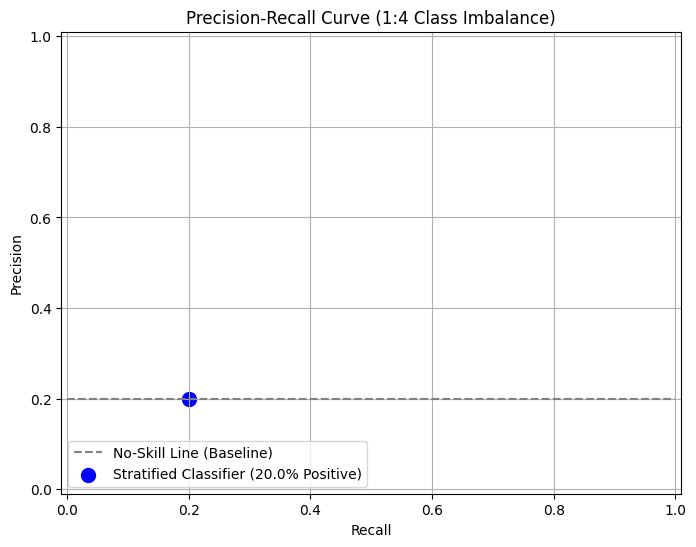

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Class Prevalence (Positive class proportion) for 1:4 imbalance
positive_prevalence = 1/5  # 20% Positive, 80% Negative

# No-Skill Line (Baseline) - Recall values from 0 to 1
recall_ns = np.linspace(0, 1, 100)
precision_ns = positive_prevalence * np.ones_like(recall_ns)  # Constant precision for No-Skill Line

# Stratified Classifier Performance
recall_stratified = positive_prevalence
precision_stratified = positive_prevalence

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(recall_ns, precision_ns, label='No-Skill Line (Baseline)', linestyle='--', color='gray')
plt.scatter(recall_stratified, precision_stratified, label=f"Stratified Classifier ({positive_prevalence*100:.1f}% Positive)", color='blue', s=100)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (1:4 Class Imbalance)')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

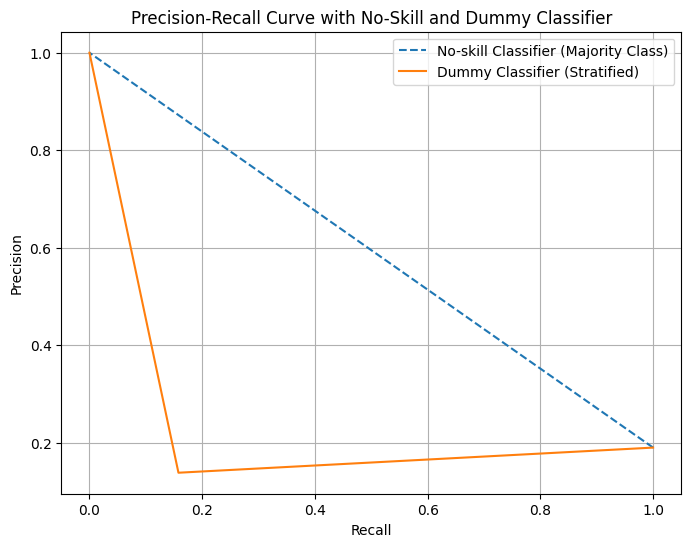

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create an imbalanced dataset with 1:4 class distribution
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.8, 0.2],
                           random_state=42, flip_y=0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a no-skill classifier that predicts the majority class
no_skill_probs = [0 for _ in range(len(y_test))]
# Calculate the precision-recall curve for a no-skill classifier
no_skill_precision, no_skill_recall, _ = precision_recall_curve(y_test, no_skill_probs)

# Define a dummy classifier with 'stratified' strategy
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
dummy_clf.fit(X_train, y_train)
y_probs_dummy = dummy_clf.predict_proba(X_test)[:, 1]
# Calculate the precision-recall curve for dummy classifier
dummy_precision, dummy_recall, _ = precision_recall_curve(y_test, y_probs_dummy)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(no_skill_recall, no_skill_precision, linestyle='--', label='No-skill Classifier (Majority Class)')
plt.plot(dummy_recall, dummy_precision, label='Dummy Classifier (Stratified)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with No-Skill and Dummy Classifier')
plt.legend()
plt.grid(True)
plt.show()


# final HP

In [42]:
l = [i for i in range(0, 5)]
min(l)

0

In [47]:
from sklearn.model_selection import ParameterGrid
import numpy as np 

def count_combinations(input_dict: dict):
    for key in input_dict.keys():
        value = input_dict[key]
        
        if type(value) == type([]):
            print(f'{key}: min={min(value)}, max={max(value)}, len={len(value)}')

In [44]:
ds1_logit_grid = {
                "penalty": ["l1", "l2", "elasticnet"],
                "dual": [True, False],
                "C": [_ for _ in range(1, 11, 1)],
                "fit_intercept": [True, False],
                "max_iter": [500],
                "solver": ["lbfgs", "newton-cg", "sag", "saga"],
                "n_jobs": [-1],
            }
print(len(ParameterGrid(ds1_logit_grid)))
count_combinations(ds1_logit_grid)

480
penalty: len=3, min=elasticnet, max=l2
dual: len=2, min=False, max=True
C: len=10, min=1, max=10
fit_intercept: len=2, min=False, max=True
max_iter: len=1, min=500, max=500
solver: len=4, min=lbfgs, max=saga
n_jobs: len=1, min=-1, max=-1


In [45]:
ds2_logit_grid = {
                "penalty": ["l1", "l2", "elasticnet"],
                "dual": [True, False],
                "C": [_ for _ in range(1, 11, 1)],
                "fit_intercept": [True, False],
                "max_iter": [500],
                "solver": ["lbfgs", "newton-cg", "sag", "saga"],
                "n_jobs": [-1],
            }
len(ParameterGrid(ds2_logit_grid))

480

In [8]:
[_ for _ in np.arange(1, 30 + 5, 5)]

[1, 6, 11, 16, 21, 26, 31]

In [48]:
import numpy as np 
ds1_dt_grid = {
                "max_depth": [_ for _ in np.arange(1, 40 + 10, 10)],
                # "max_features": ['sqrt', 'log2', None],
                "min_samples_leaf": [_ for _ in np.arange(1, 30 + 5, 5)],
                "min_samples_split": [_ for _ in np.arange(1, 40 + 5, 5)],
                
                "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.02, 0.02)]
            }
print(len(ParameterGrid(ds1_dt_grid)))
count_combinations(ds1_dt_grid)

1890
max_depth: min=1, max=41, len=5
min_samples_leaf: min=1, max=31, len=7
min_samples_split: min=1, max=41, len=9
min_impurity_decrease: min=0.005, max=0.10500000000000001, len=6


In [49]:
import numpy as np 

ds2_dt_grid = {
                "max_depth": [_ for _ in np.arange(1, 20 + 5, 5)],
                # "max_features": ['sqrt', 'log2', None],
                "min_samples_leaf": [_ for _ in np.arange(1, 15 + 3, 3)],
                "min_samples_split": [_ for _ in np.arange(1, 10 + 1, 1)],
                "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.02, 0.02)]
            }
print(len(ParameterGrid(ds2_dt_grid)))
count_combinations(ds2_dt_grid)

1800
max_depth: min=1, max=21, len=5
min_samples_leaf: min=1, max=16, len=6
min_samples_split: min=1, max=10, len=10
min_impurity_decrease: min=0.005, max=0.10500000000000001, len=6


In [50]:
import numpy as np 
ds1_rf_grid = {
                    "max_depth": [_ for _ in np.arange(1, 50 + 15, 15)],
                    "n_estimators": [_ for _ in np.arange(50, 500 + 100, 100)],
                    # "max_features": ['sqrt', 'log2', None], 
                    "min_samples_leaf": [_ for _ in np.arange(1, 30 + 10, 10)],
                    "min_samples_split": [_ for _ in np.arange(2, 30 + 5, 5)],
                    "criterion": ["entropy"],
                    "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.04, 0.04)]
            }

print(len(ParameterGrid(ds1_rf_grid)))
count_combinations(ds1_rf_grid)

3360
max_depth: min=1, max=61, len=5
n_estimators: min=50, max=550, len=6
min_samples_leaf: min=1, max=31, len=4
min_samples_split: min=2, max=32, len=7
criterion: min=entropy, max=entropy, len=1
min_impurity_decrease: min=0.005, max=0.125, len=4


In [51]:
import numpy as np 
ds2_rf_grid = {
                    "max_depth": [_ for _ in np.arange(1, 20 + 5, 5)],
                    "n_estimators": [_ for _ in np.arange(50, 300 + 100, 100)],
                    # "max_features": ['sqrt', 'log2', None], 
                    "min_samples_leaf": [_ for _ in np.arange(1, 20 + 5, 5)],
                    "min_samples_split": [_ for _ in np.arange(2, 20 + 5, 5)],
                    "criterion": ["entropy"],
                    "min_impurity_decrease": [_ for _ in np.arange(0.005, 0.1+0.02, 0.02)]
            }
print(len(ParameterGrid(ds2_rf_grid)))
count_combinations(ds2_rf_grid)

3000
max_depth: min=1, max=21, len=5
n_estimators: min=50, max=350, len=4
min_samples_leaf: min=1, max=21, len=5
min_samples_split: min=2, max=22, len=5
criterion: min=entropy, max=entropy, len=1
min_impurity_decrease: min=0.005, max=0.10500000000000001, len=6


In [52]:
import numpy as np 
ds1_xgb_grid =  {   
                    "max_depth": [_ for _ in np.arange(1, 30 + 10, 10)],
                    "reg_lambda": [_ for _ in np.arange(1, 10 + 2, 2)],
                    "n_estimators": [_ for _ in np.arange(100, 250+50, 50)],
                    "learning_rate": [_ for _ in np.arange(0.1, 1 + 0.2, 0.2)],
                    "min_child_weight": [_ for _ in np.arange(1, 7+2, 2)],
            }

print(len(ParameterGrid(ds1_xgb_grid)))
count_combinations(ds1_xgb_grid)

2304
max_depth: min=1, max=31, len=4
reg_lambda: min=1, max=11, len=6
n_estimators: min=100, max=250, len=4
learning_rate: min=0.1, max=1.1000000000000003, len=6
min_child_weight: min=1, max=7, len=4


In [53]:
import numpy as np 
ds2_xgb_grid = {   
                "max_depth": [_ for _ in np.arange(1, 10 + 2, 2)],
                "reg_lambda": [_ for _ in np.arange(1, 10 + 2, 2)],
                "n_estimators": [_ for _ in np.arange(100, 300+100, 100)],
                "learning_rate": [_ for _ in np.arange(0.1, 1 + 0.2, 0.2)],
                "min_child_weight": [_ for _ in np.arange(1, 7+2, 2)],
            }

print(len(ParameterGrid(ds2_xgb_grid)))
count_combinations(ds2_xgb_grid)

2592
max_depth: min=1, max=11, len=6
reg_lambda: min=1, max=11, len=6
n_estimators: min=100, max=300, len=3
learning_rate: min=0.1, max=1.1000000000000003, len=6
min_child_weight: min=1, max=7, len=4


In [54]:
import numpy as np 
ds1_lgb_grid = {
                    "max_depth": [_ for _ in np.arange(1, 10+3, 3)],
                    # "lambda_l1": [_ for _ in np.arange(1, 10+2, 2)],
                    "lambda_l2": [_ for _ in np.arange(1, 10+3, 3)],
                    "num_leaves": [_ for _ in np.arange(50, 80+15, 15)],
                    "learning_rate": [_ for _ in np.arange(0.1, 1+0.3, 0.3)],
                    "min_data_in_leaf": [_ for _ in np.arange(50, 250+50, 50)],
                    "min_gain_to_split": [_ for _ in np.arange(0.1, 1+0.3, 0.3)],
            }

print(len(ParameterGrid(ds1_lgb_grid)))
count_combinations(ds1_lgb_grid)

3840
max_depth: min=1, max=10, len=4
lambda_l2: min=1, max=10, len=4
num_leaves: min=50, max=80, len=3
learning_rate: min=0.1, max=1.0000000000000002, len=4
min_data_in_leaf: min=50, max=250, len=5
min_gain_to_split: min=0.1, max=1.0000000000000002, len=4


In [55]:
import numpy as np 
ds2_lgb_grid = {
                "max_depth": [_ for _ in np.arange(1, 10+3, 3)],
                # "lambda_l1": [_ for _ in np.arange(1, 10+2, 2)],
                "lambda_l2": [_ for _ in np.arange(1, 10+3, 3)],
                "num_leaves": [_ for _ in np.arange(50, 80+15, 15)],
                "learning_rate": [_ for _ in np.arange(0.1, 1+0.3, 0.3)],
                "min_data_in_leaf": [_ for _ in np.arange(10, 30+15, 15)],
                "min_gain_to_split": [_ for _ in np.arange(0.1, 1+0.2, 0.2)],
            }
print(len(ParameterGrid(ds2_lgb_grid)))
count_combinations(ds2_lgb_grid)

3456
max_depth: min=1, max=10, len=4
lambda_l2: min=1, max=10, len=4
num_leaves: min=50, max=80, len=3
learning_rate: min=0.1, max=1.0000000000000002, len=4
min_data_in_leaf: min=10, max=40, len=3
min_gain_to_split: min=0.1, max=1.1000000000000003, len=6


In [72]:
[_ for _ in np.arange(0.1, 1+0.2, 0.2)]

[0.1,
 0.30000000000000004,
 0.5000000000000001,
 0.7000000000000001,
 0.9000000000000001,
 1.1000000000000003]